In [1]:
import numpy as np
import pandas as pd
import networkx as nx

from algorithm.util.directed_graph import DirectedGraph
from algorithm.util.read_pairs_data import read_data_db
from algorithm.util.graph_vis import GraphVisualization
from algorithm.first_accept_n_way import FirstAcceptNWay

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time

In [2]:
pairs = read_data_db("2021_01_05")
pairs.head()

,pair_num,donor_bloodtype,recipient_bloodtype,pra
0,P400,A,B,5
1,P401,B,A,92
2,P402,B,A,5
3,P403,B,O,10
4,P404,A,B,5


In [3]:
a = time.time()
grph = DirectedGraph(pairs)
b = time.time() - a
print(b, "s")

0.10871577262878418 s


In [4]:
grph.get_adjacency_list()

{'P400': ['P401',
  'P402',
  'P405',
  'P408',
  'P410',
  'P413',
  'P416',
  'P418',
  'P419',
  'P420',
  'P422',
  'P423',
  'P426',
  'P427',
  'P437',
  'P440',
  'P441',
  'P449',
  'P453',
  'P455',
  'P459',
  'P461',
  'P464',
  'P466',
  'P471',
  'P477',
  'P482',
  'P486',
  'P488',
  'P490',
  'P491',
  'P498'],
 'P401': ['P400',
  'P404',
  'P405',
  'P422',
  'P447',
  'P454',
  'P456',
  'P462',
  'P464',
  'P470',
  'P474',
  'P476',
  'P479',
  'P481',
  'P483',
  'P484',
  'P489'],
 'P402': ['P400',
  'P404',
  'P405',
  'P422',
  'P447',
  'P454',
  'P456',
  'P462',
  'P464',
  'P470',
  'P474',
  'P476',
  'P479',
  'P481',
  'P483',
  'P484',
  'P489'],
 'P403': ['P400',
  'P404',
  'P405',
  'P422',
  'P447',
  'P454',
  'P456',
  'P462',
  'P464',
  'P470',
  'P474',
  'P476',
  'P479',
  'P481',
  'P483',
  'P484',
  'P489'],
 'P404': ['P401',
  'P402',
  'P405',
  'P408',
  'P410',
  'P413',
  'P416',
  'P418',
  'P419',
  'P420',
  'P422',
  'P423',
  'P42

In [5]:
len(grph.get_edges())

4033

In [6]:
cycles = grph.get_cycles()

In [7]:
cycles

[['P400', 'P401'],
 ['P401', 'P404'],
 ['P400', 'P401', 'P404', 'P402'],
 ['P404', 'P402'],
 ['P401', 'P404', 'P402', 'P405'],
 ['P402', 'P405'],
 ['P400', 'P401', 'P404', 'P402', 'P405', 'P408'],
 ['P401', 'P404', 'P402', 'P405', 'P408'],
 ['P402', 'P405', 'P408'],
 ['P400', 'P401', 'P404', 'P402', 'P405', 'P408', 'P403'],
 ['P404', 'P402', 'P405', 'P408', 'P403'],
 ['P405', 'P408', 'P403'],
 ['P401', 'P404', 'P402', 'P405', 'P408', 'P403', 'P422'],
 ['P402', 'P405', 'P408', 'P403', 'P422'],
 ['P405', 'P408', 'P403', 'P422'],
 ['P408', 'P403', 'P422'],
 ['P401', 'P404', 'P402', 'P405', 'P408', 'P403', 'P422', 'P410'],
 ['P402', 'P405', 'P408', 'P403', 'P422', 'P410'],
 ['P405', 'P408', 'P403', 'P422', 'P410'],
 ['P408', 'P403', 'P422', 'P410'],
 ['P400',
  'P401',
  'P404',
  'P402',
  'P405',
  'P408',
  'P403',
  'P422',
  'P410',
  'P413'],
 ['P401', 'P404', 'P402', 'P405', 'P408', 'P403', 'P422', 'P410', 'P413'],
 ['P402', 'P405', 'P408', 'P403', 'P422', 'P410', 'P413'],
 ['P403',

In [8]:
fanway = FirstAcceptNWay(5, 'maximum')

In [9]:
a = time.time()
fanway.finalize_exchange(grph)
b = time.time() - a
print(b, "s")

0.0029914379119873047 s


In [10]:
def display_all(list_of_pairs):
    for p in list_of_pairs:
        display(pairs[pairs['pair_num'] == p])

In [11]:
flatten = lambda t: [item for sublist in t for item in sublist]
display_all([i for i in grph.medical_data['pair_num'] if (i not in flatten(fanway.cycles))])

,pair_num,donor_bloodtype,recipient_bloodtype,pra
9,P409,AB,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
22,P422,A,AB,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
26,P426,AB,A,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
31,P431,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
33,P433,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
34,P434,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
35,P435,B,O,32


,pair_num,donor_bloodtype,recipient_bloodtype,pra
36,P436,AB,O,90


,pair_num,donor_bloodtype,recipient_bloodtype,pra
39,P439,A,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
42,P442,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
43,P443,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
44,P444,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
45,P445,AB,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
46,P446,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
50,P450,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
52,P452,A,O,32


,pair_num,donor_bloodtype,recipient_bloodtype,pra
57,P457,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
58,P458,AB,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
60,P460,A,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
61,P461,AB,A,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
63,P463,AB,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
65,P465,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
67,P467,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
68,P468,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
69,P469,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
73,P473,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
75,P475,A,O,90


,pair_num,donor_bloodtype,recipient_bloodtype,pra
77,P477,B,A,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
78,P478,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
80,P480,O,O,92


,pair_num,donor_bloodtype,recipient_bloodtype,pra
85,P485,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
87,P487,A,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
89,P489,AB,B,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
90,P490,AB,A,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
92,P492,A,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
93,P493,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
94,P494,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
95,P495,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
96,P496,A,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
97,P497,A,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
99,P499,B,O,5


In [12]:
fanway.show_donation_mapping('text')

P400 --> P401
P404 --> P402
P405 --> P408 --> P403
P410 --> P413 --> P406
P416 --> P447 --> P464
P418 --> P454
P419 --> P407
P420 --> P423
P427 --> P437 --> P411
P440 --> P441 --> P412
P449 --> P456 --> P462
P453 --> P414
P455 --> P459
P466 --> P415
P471 --> P417
P470 --> P421
P474 --> P476 --> P482
P479 --> P486 --> P488 --> P424
P481 --> P425 --> P428 --> P491
P429 --> P430
P432 --> P498
P438 --> P448
P451 --> P472
P483 --> P484


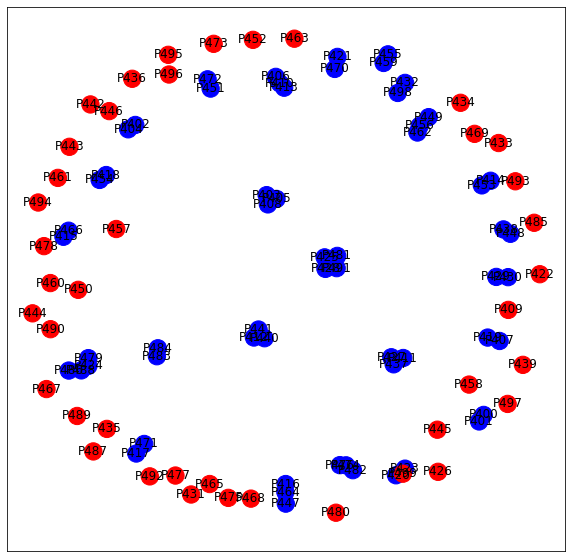

In [13]:
plt.figure(figsize=(10, 10))
fanway.show_donation_mapping('graph')

In [14]:
fanway.get_num_of_matched_pairs()

59